In [1]:
from __future__ import division
import sys, os
import numpy as np
import pandas as pd
from collections import OrderedDict
import pyfits

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.mlab as mlab
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.patches import Ellipse

In [2]:
fakedatafile = "fakeit_fitresults_grbm_-01-_vs_grbm+blackb_-01-.fit"

models = fakedatafile.split('fakeit_fitresults_')[1].strip('.fit')

mod1 = fakedatafile.split('_')[2]

ver1 = fakedatafile.split('-')[1]

mod2 = fakedatafile.split('vs_')[1].split('_')[0]

ver2 = fakedatafile.split('vs_')[1].split('-')[1]

detector     = 'GBMwLAT'

burst        = 'bn080916009'

data_dir     = "/Users/derek/Documents/KimiZ/GRBs2/analysis/LAT/%s/integrated/"%burst
mod_dir      = "/Users/derek/Documents/KimiZ/GRBs2/analysis/LAT/%s/PYXSPEC/%s/%s/"%(burst, detector, mod1)
desk_dir     = "/Users/derek/Desktop/kim/"
#mod_dir         = "/Users/KimiZ/GRBs2/analysis/LAT/%s/PYXSPEC/%s/%s/"%(burst, detector, modname)
#data_dir        = "/Users/KimiZ/GRBs2/analysis/LAT/%s/integrated/"%burst


outfilename    = "AfterFakeit_ParamDistPlots_%s.pdf"%(models)
outfile        = os.path.join(mod_dir, outfilename)
outfile2       = os.path.join(desk_dir, outfilename)

paramoutfile   = os.path.join(mod_dir, "AfterFakeit_ParamErrors_%s.txt"%(models))
paramoutfile2  = os.path.join(mod_dir, "AfterFakeit_ParamErrorsEASYREAD_%s.txt"%(models))
paramoutfile3  = os.path.join(desk_dir, "AfterFakeit_ParamErrorsEASYREAD_%s.txt"%(models))

In [3]:
Fdata = pyfits.open(os.path.join(data_dir, fakedatafile))

In [4]:
iter = 0
Bdata = pd.DataFrame()
for name in Fdata[1].data.columns.names:
    Bdata["%s"%name] = Fdata[1].data["%s"%name]
    if 'PARAM' in name:
        iter += 1
    else:
        pass
nPars = iter

In [5]:
Bdata = Bdata.astype('float64')

# SAVE PLOTS

0

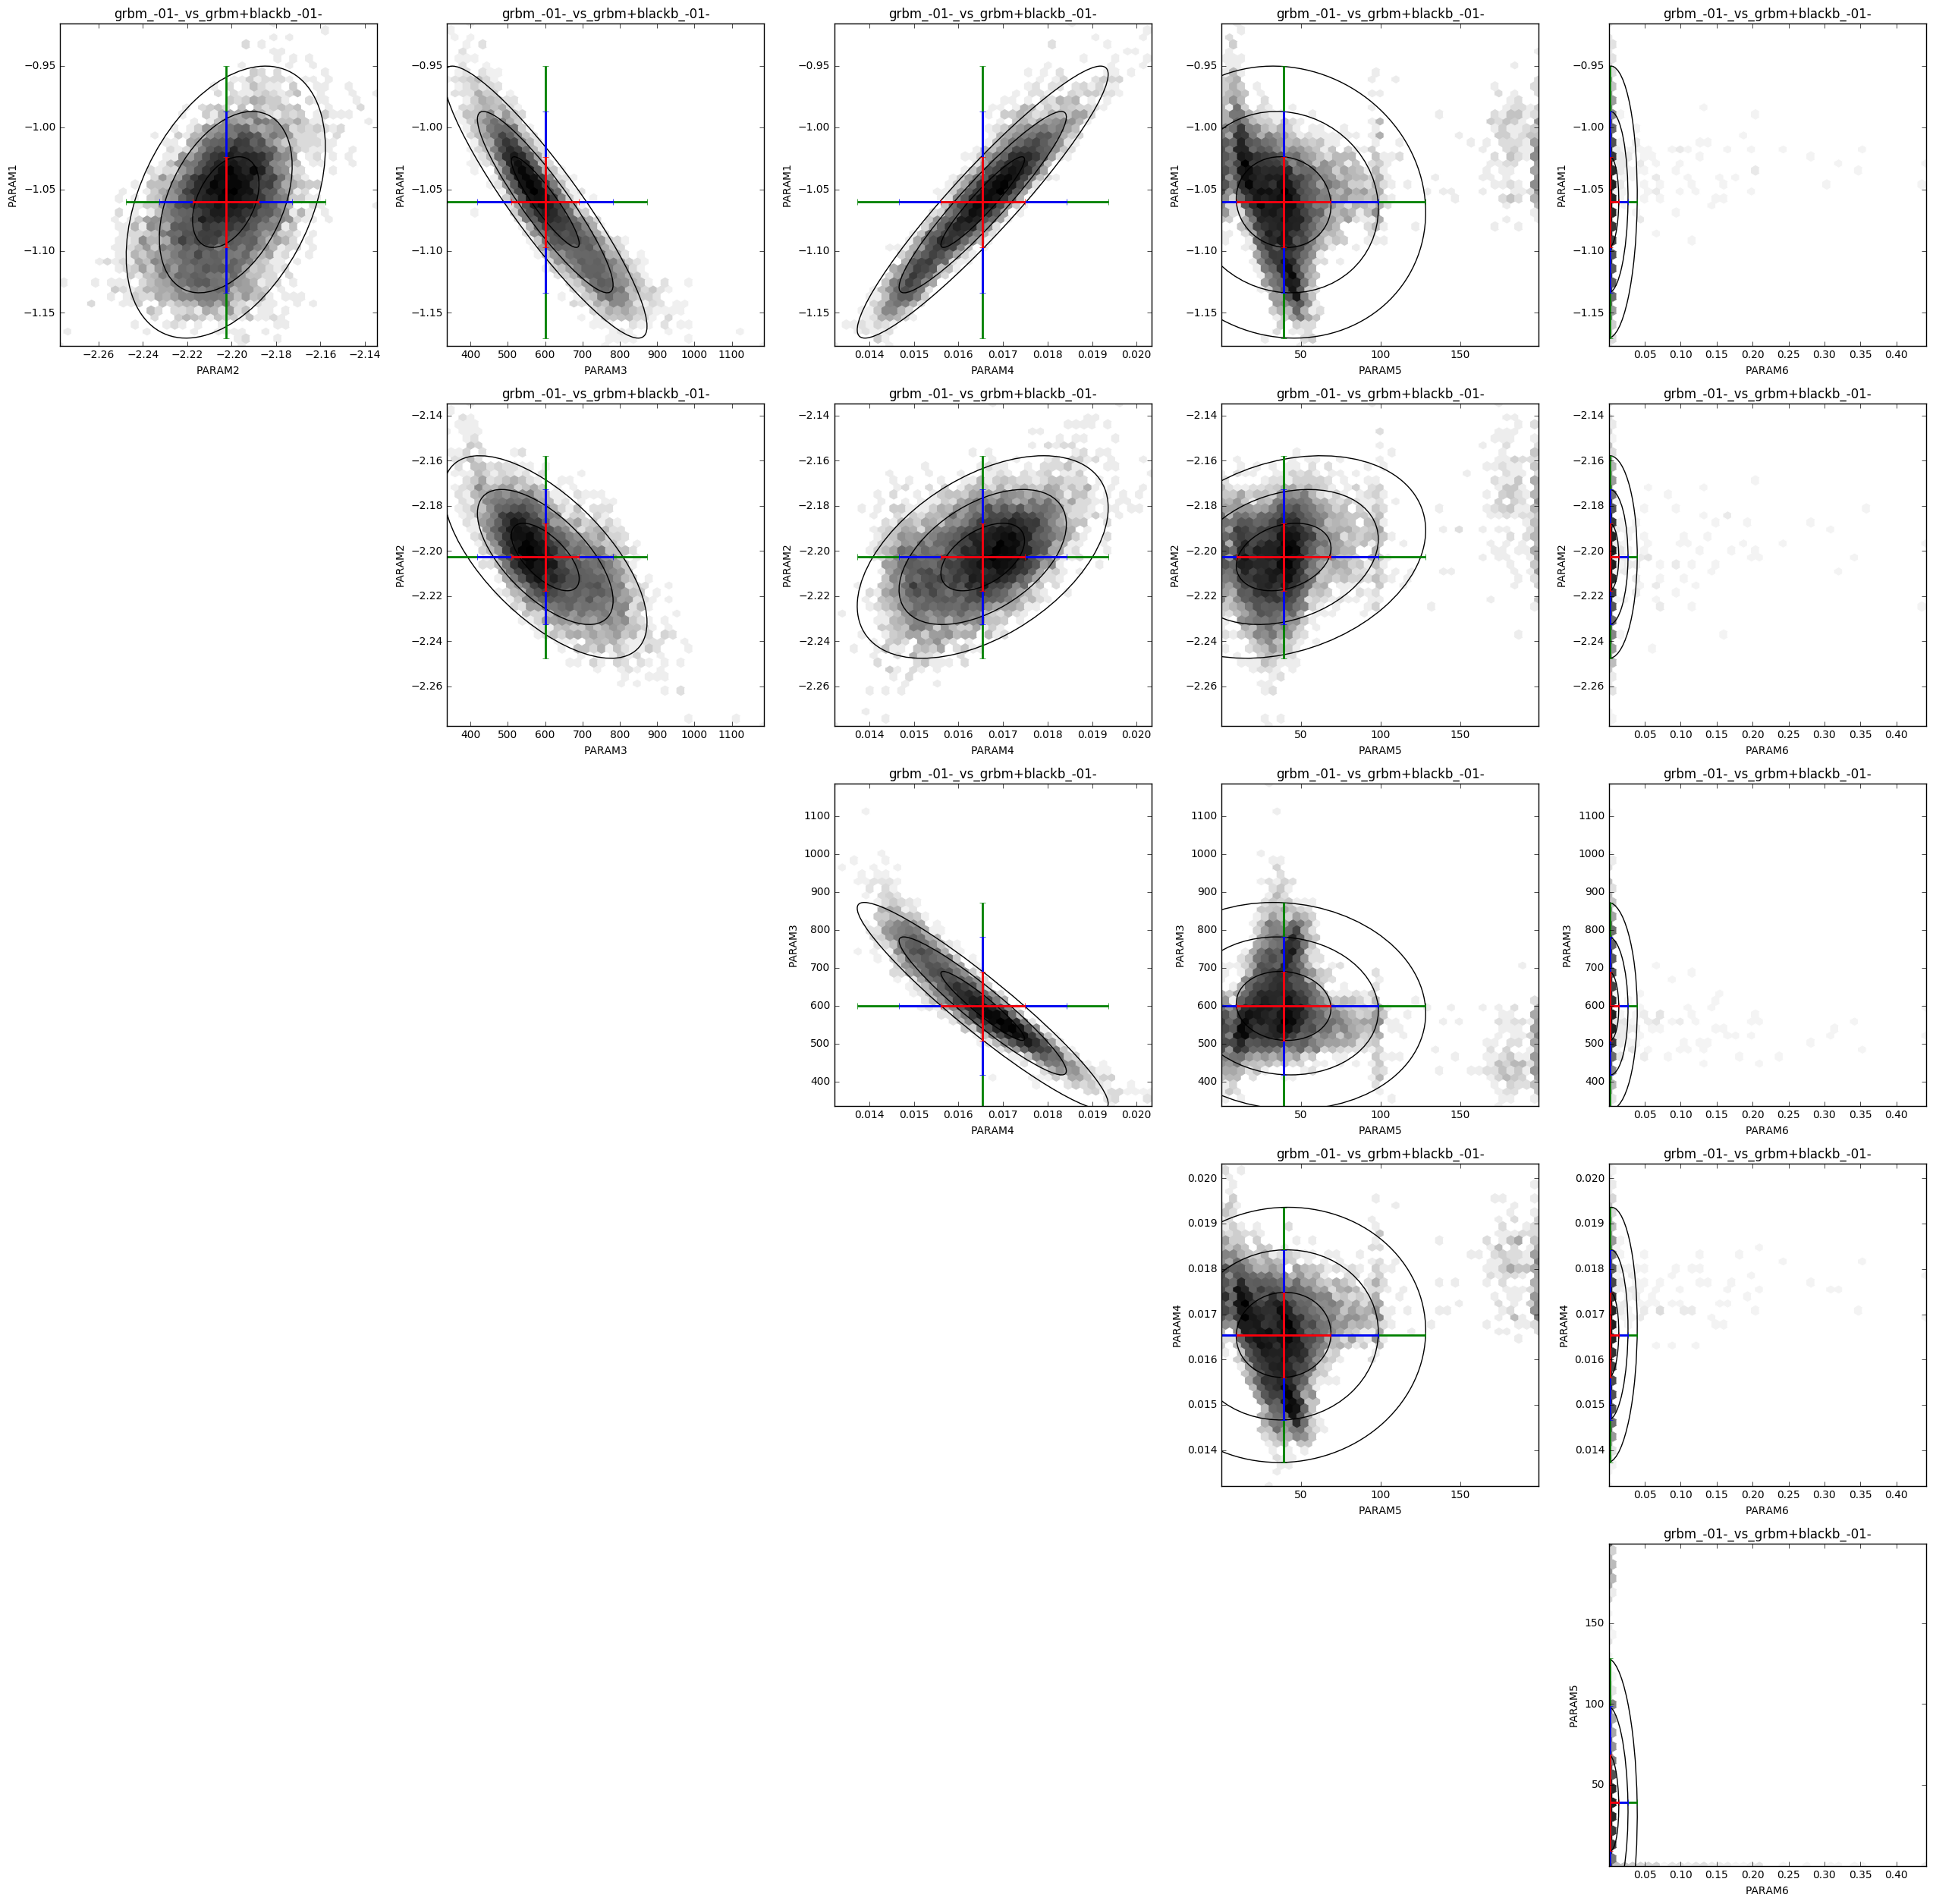

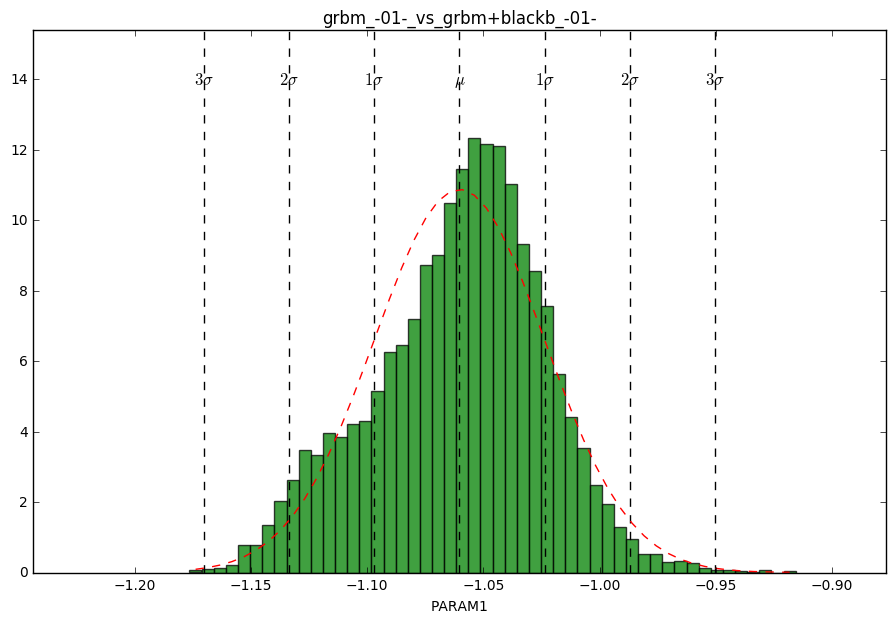

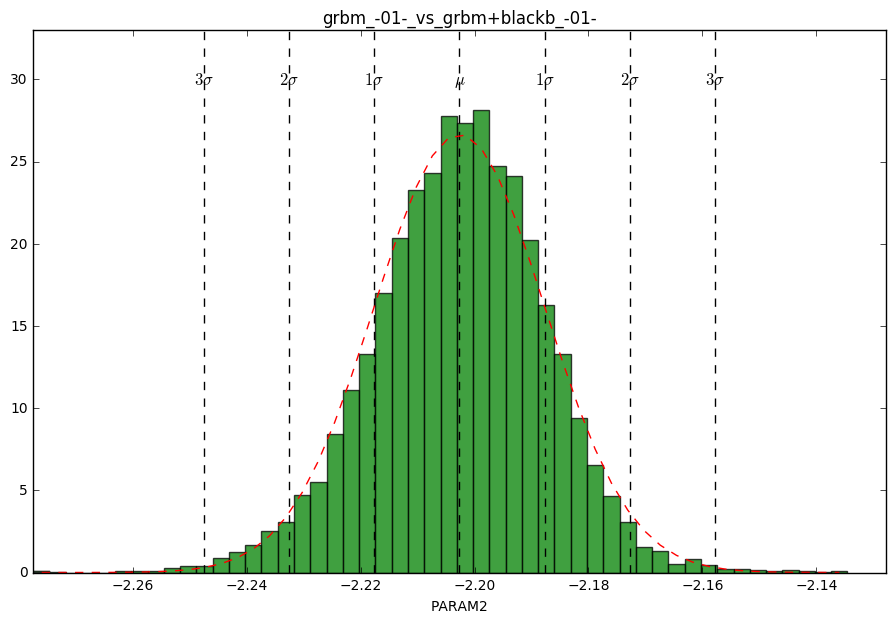

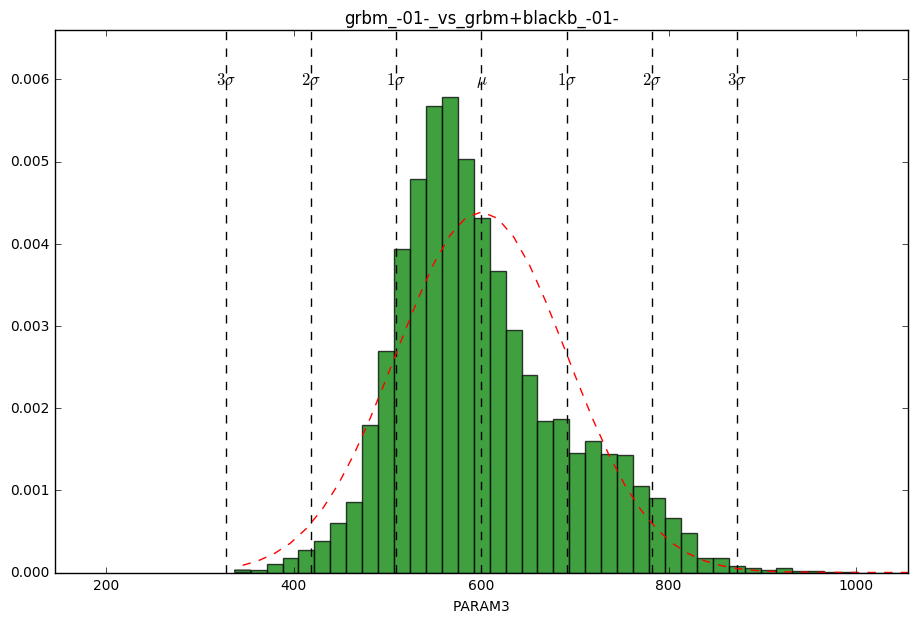

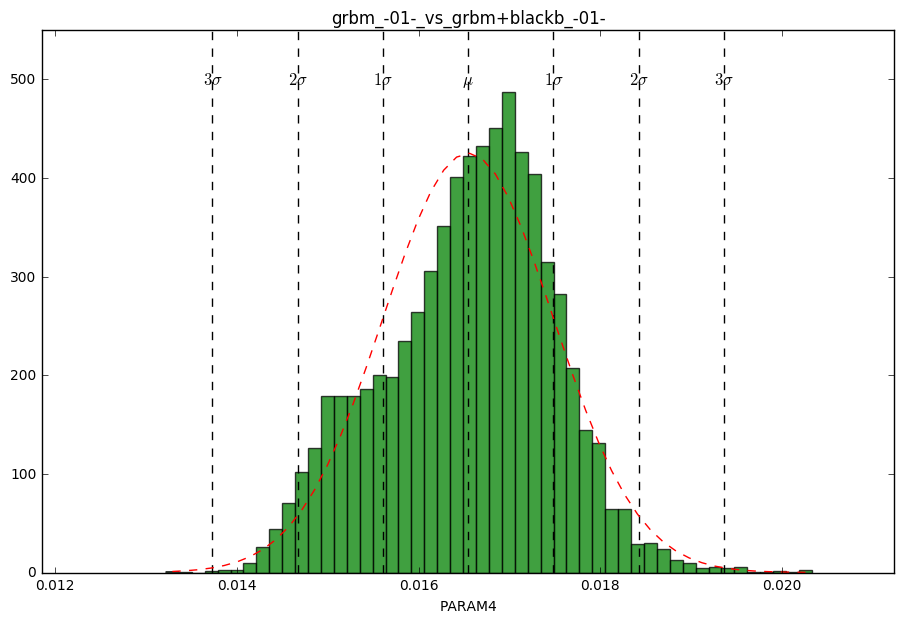

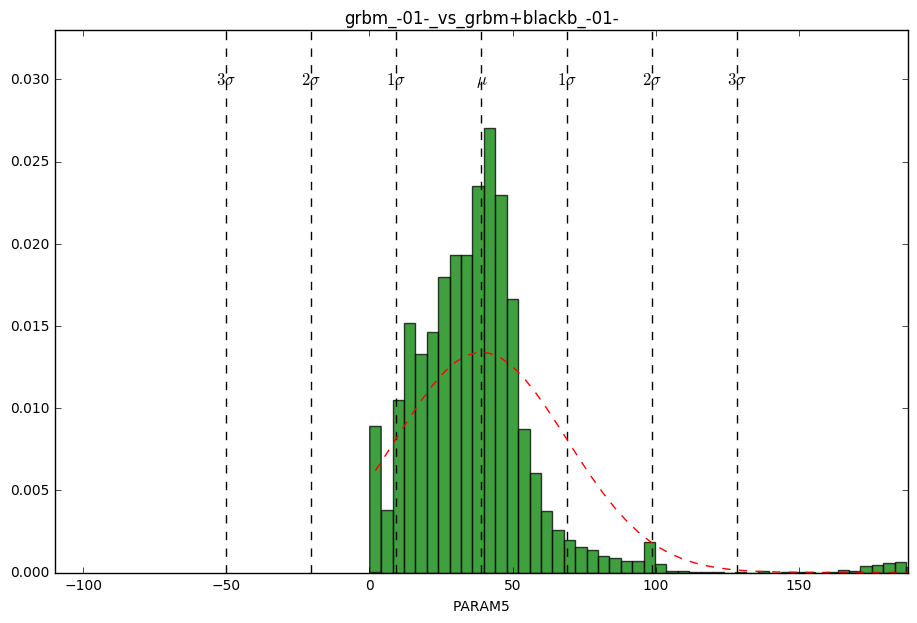

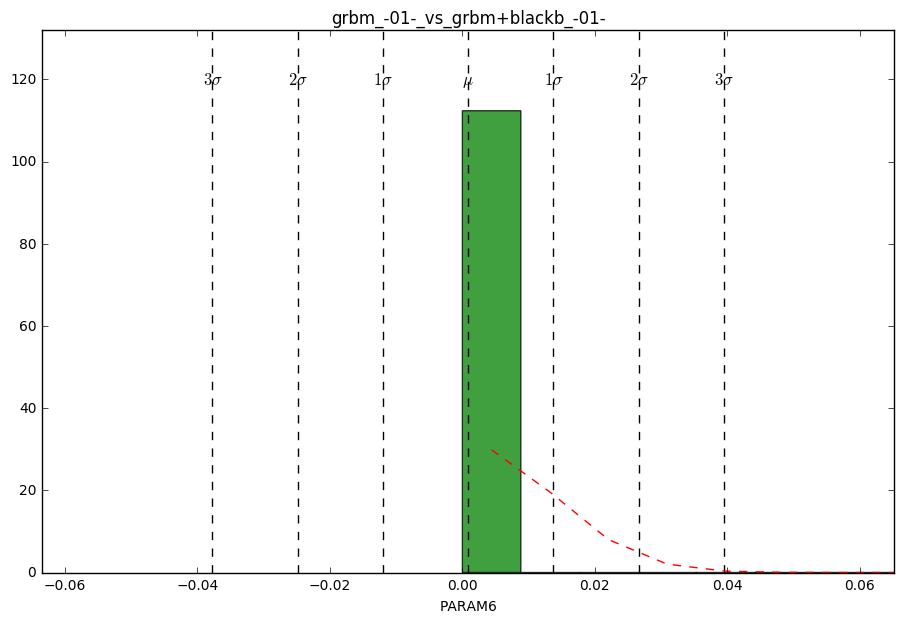

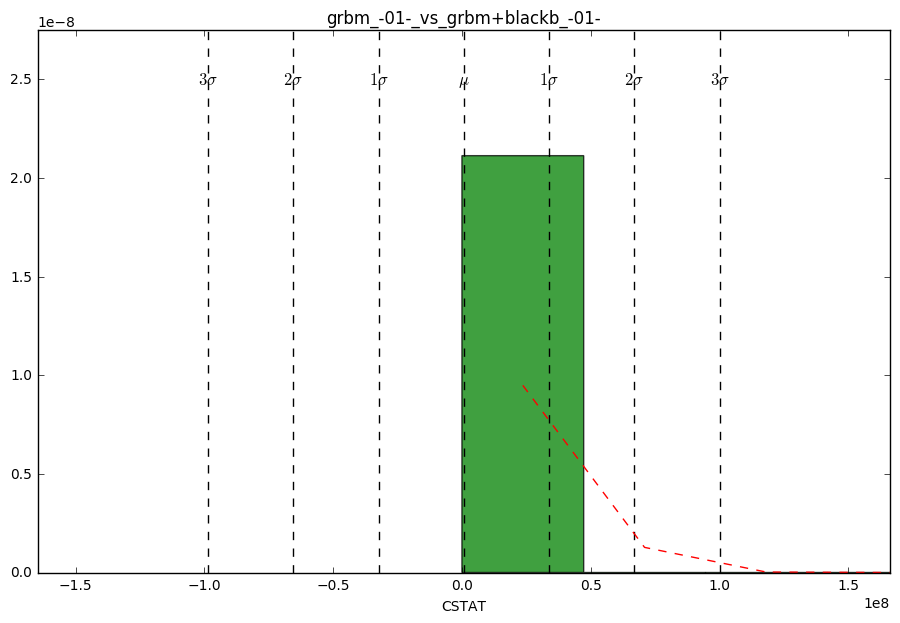

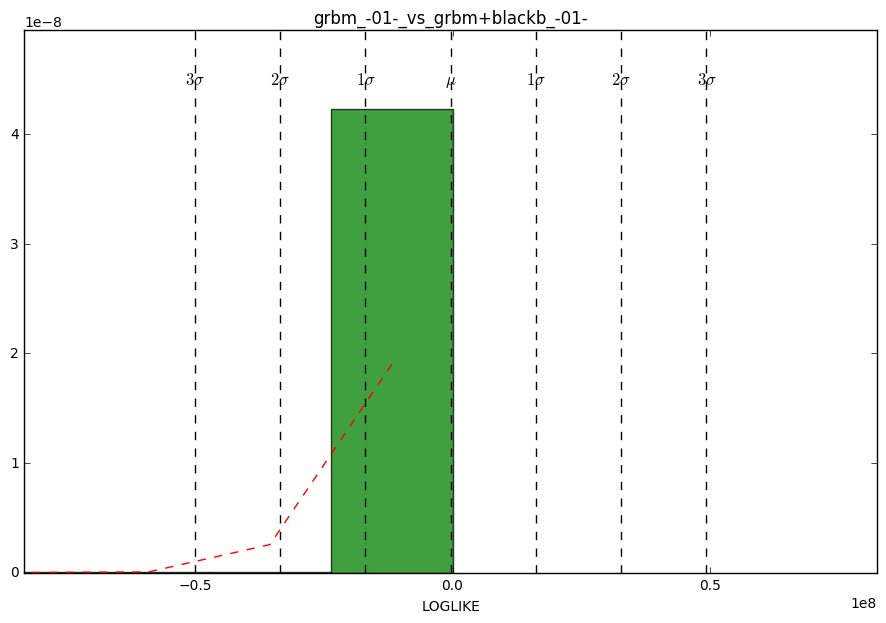

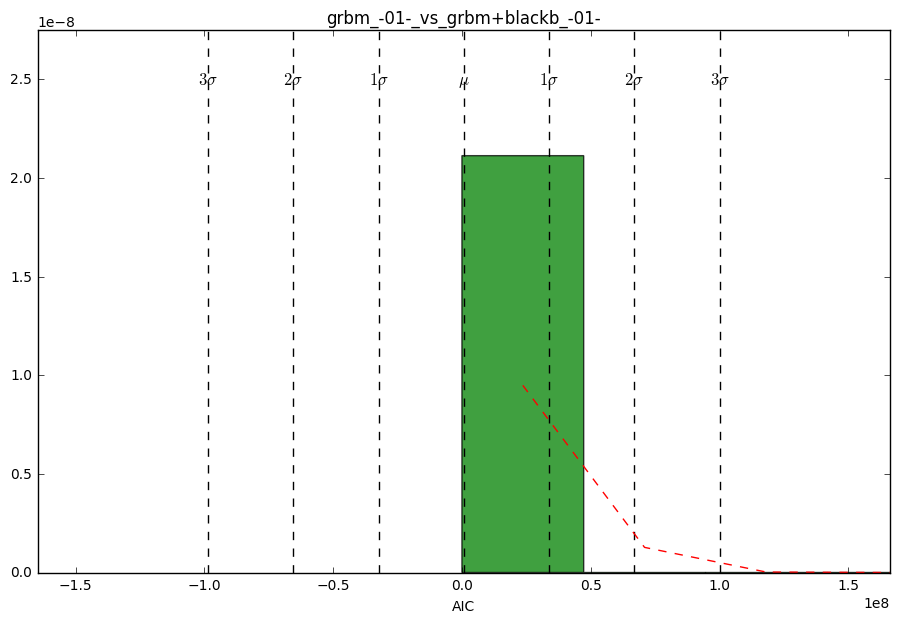

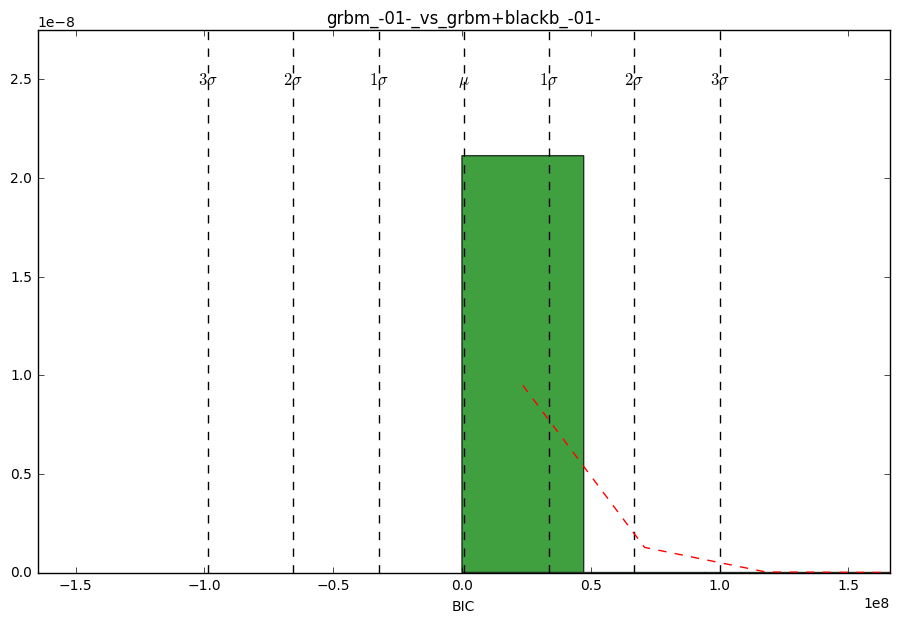

In [6]:
pp = PdfPages(outfile)

def Plot_ParamComparison(modelname, ax, one, two):

    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]

    
    XLabel = 'PARAM%i'%(one)
    YLabel = 'PARAM%i'%(two)

    x = Bdata["%s"%XLabel]
    y = Bdata["%s"%YLabel]
    muX, sigmaX = np.mean(x), np.sqrt(np.var(x))
    muY, sigmaY = np.mean(y), np.sqrt(np.var(y))

    cov = np.cov(x, y)

    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    
    for j in xrange(1, 4):
        width = 2 * j * np.sqrt(vals)[0]
        height = 2 * j * np.sqrt(vals)[1]
        ell = Ellipse(xy=(np.mean(x), np.mean(y)),
                      width= width, height= height,
                      angle= theta)
        ell.set_facecolor('none')
        ax.add_artist(ell)

    plt.errorbar(np.mean(x), np.mean(y), xerr= 3*sigmaX, yerr= 3*sigmaY, color='green', lw=2)
    plt.errorbar(np.mean(x), np.mean(y), xerr= 2*sigmaX, yerr= 2*sigmaY, color='blue', lw=2)
    plt.errorbar(np.mean(x), np.mean(y), xerr= sigmaX, yerr= sigmaY, color='red', lw=2)
    plt.hexbin(x, y, bins='log', gridsize=40, cmap=plt.cm.Greys)#, alpha = 0.1)
    plt.xlim(x.min(), x.max())
    plt.ylim(y.min(), y.max())
    plt.xlabel("%s"%XLabel)
    plt.ylabel("%s"%YLabel)
    plt.title("%s"%modelname)


plt.figure(figsize=(5*nPars, 5*nPars))
for i in range(nPars):
    for j in range(i):
        ax = plt.subplot(nPars, nPars, nPars * (j + 1) + i + 1)
        Plot_ParamComparison(models, ax, i+1, j+1)

plt.tight_layout()
plt.savefig(pp, format='pdf', dpi=150, bbox_inches = 'tight')


def Plot_ParamDistributions(modelname, parameter, Xlimits=None, bins=50):
    XLabel = str(parameter)

    x = Bdata["%s"%XLabel]
    mu, sigma = np.mean(x), np.sqrt(np.var(x))
    
    fig = plt.figure(figsize = (11,7))
    ax = fig.add_subplot(111)

    n, bins, patches = ax.hist(x, bins, normed=1, facecolor='green', alpha=0.75)
    bincenters = 0.5*(bins[1:]+bins[:-1])

    # add a 'best fit' line for the normal PDF
    y = mlab.normpdf(bincenters, mu, sigma)


    x1siglo = mu-sigma
    x1sighi = mu+sigma
    x2siglo = mu-2*sigma
    x2sighi = mu+2*sigma
    x3siglo = mu-3*sigma
    x3sighi = mu+3*sigma

    # ax.get_xlim()
    ylow, yhi = ax.get_ylim()
    ylabelpos = yhi - (yhi*.01)
    yhigh = yhi + (yhi*.1)
    #ylow, yhigh = ax.yaxis.get_data_interval()
    ax.vlines(mu, ylow, yhigh, linestyle='--', color="black") # mu + sigma
    ax.vlines(mu+sigma, ylow, yhigh, linestyle='--', color="black") # mu + sigma
    ax.vlines(mu-sigma, ylow, yhigh, linestyle='--', color="black") # mu - sigma
    ax.vlines(mu+2*sigma, ylow, yhigh, linestyle='--', color="black") # mu + 2*sigma
    ax.vlines(mu-2*sigma, ylow, yhigh, linestyle='--', color="black") # mu - 2*sigma
    ax.vlines(mu+3*sigma, ylow, yhigh, linestyle='--', color="black") # mu + 3*sigma
    ax.vlines(mu-3*sigma, ylow, yhigh, linestyle='--', color="black") # mu - 3*sigma
    #ax.text(x,y, "text")
    ax.text(mu, ylabelpos, r"$\mu$", fontsize = 12, horizontalalignment='center')
    ax.text(x1sighi, ylabelpos, r"$1\sigma$", fontsize = 12, horizontalalignment='center')
    ax.text(x1siglo, ylabelpos, r"$1\sigma$", fontsize = 12, horizontalalignment='center')
    ax.text(x2sighi, ylabelpos, r"$2\sigma$", fontsize = 12, horizontalalignment='center')
    ax.text(x2siglo, ylabelpos, r"$2\sigma$", fontsize = 12, horizontalalignment='center')
    ax.text(x3sighi, ylabelpos, r"$3\sigma$", fontsize = 12, horizontalalignment='center')
    ax.text(x3siglo, ylabelpos, r"$3\sigma$", fontsize = 12, horizontalalignment='center')
    ax.set_ylim(ylow, yhigh)
    
    ax.set_xlim(mu-5*sigma, mu+5*sigma)
    
    # if Xlimits is not None:
    #     ax.set_xlim(Xlimits)
    
    ax.plot(bincenters, y, 'r--', linewidth=1)
    ax.set_xlabel('%s'%XLabel)
    ax.set_title('%s'%modelname)


for name in Bdata.columns:
    if 'PARAM' in name:
        Plot_ParamDistributions(models, name)
        plt.savefig(pp, format='pdf', dpi=150, bbox_inches = 'tight')
    elif ('AIC' in name) or ('BIC' in name) or ('LOGLIKE' in name) or ('CSTAT' in name):
        Plot_ParamDistributions(models, name)
        plt.savefig(pp, format='pdf', dpi=150, bbox_inches = 'tight')
    else:
        pass

pp.close()

os.system('cp %s %s'%(outfile, outfile2))

# SAVE DATA TO FILES

In [7]:
target = open(paramoutfile2, 'w')

for name in Bdata.columns:
    if 'PARAM' in name:
        x = Bdata["%s"%name]
        muX, sigmaX = np.mean(x), np.sqrt(np.var(x))
        line1 =  "%s"%name
        line2 = "Value:    %.13f"%muX
        line3 = "1-sigma:  %.13f, %.13f"%(muX - sigmaX, muX + sigmaX)
        line4 = "2-sigma:  %.13f, %.13f"%(muX - 2*sigmaX, muX + 2*sigmaX)
        line5 = "3-sigma:  %.13f, %.13f"%(muX - 3*sigmaX, muX + 3*sigmaX)
        line6 = "min max:  %.13f, %.13f"%(x.min(), x.max())
        #print ""
        target.write(line1)
        target.write("\n")
        target.write(line2)
        target.write("\n")
        target.write(line3)
        target.write("\n")
        target.write(line4)
        target.write("\n")
        target.write(line5)
        target.write("\n")
        target.write(line6)
        target.write("\n")
        target.write("\n")
    elif ('AIC' in name) or ('BIC' in name) or ('LOGLIKE' in name) or ('CSTAT' in name):
        x = Bdata["%s"%name]
        muX, sigmaX = np.mean(x), np.sqrt(np.var(x))
        line1 =  "%s"%name
        line2 = "Value:    %.13f"%muX
        line3 = "1-sigma:  %.13f, %.13f"%(muX - sigmaX, muX + sigmaX)
        line4 = "2-sigma:  %.13f, %.13f"%(muX - 2*sigmaX, muX + 2*sigmaX)
        line5 = "3-sigma:  %.13f, %.13f"%(muX - 3*sigmaX, muX + 3*sigmaX)
        line6 = "min max:  %.13f, %.13f"%(x.min(), x.max())
        #print ""
        target.write(line1)
        target.write("\n")
        target.write(line2)
        target.write("\n")
        target.write(line3)
        target.write("\n")
        target.write(line4)
        target.write("\n")
        target.write(line5)
        target.write("\n")
        target.write(line6)
        target.write("\n")
        target.write("\n")
    else:
        pass

target.close()

param_dict = OrderedDict()
for name in Bdata.columns:
    if 'PARAM' in name:
        x = Bdata["%s"%name]
        muX, sigmaX = np.mean(x), np.sqrt(np.var(x))
        # print "%s"%name
        # print "Value:    %.13f"%muX
        # print "1-sigma:  %.13f, %.13f"%(muX - sigmaX, muX + sigmaX)
        # print "2-sigma:  %.10f, %.10f"%(muX - 2*sigmaX, muX + 2*sigmaX)
        # print "3-sigma:  %.10f, %.10f"%(muX - 3*sigmaX, muX + 3*sigmaX)
        # print ""
        param_dict["%s"%name] = [muX, muX - sigmaX, muX + sigmaX, muX - 2*sigmaX, muX + 2*sigmaX, muX - 3*sigmaX, muX + 3*sigmaX, x.min(), x.max()]
    elif ('AIC' in name) or ('BIC' in name) or ('LOGLIKE' in name) or ('CSTAT' in name):
        x = Bdata["%s"%name]
        muX, sigmaX = np.mean(x), np.sqrt(np.var(x))
        param_dict["%s"%name] = [muX, muX - sigmaX, muX + sigmaX, muX - 2*sigmaX, muX + 2*sigmaX, muX - 3*sigmaX, muX + 3*sigmaX, x.min(), x.max()]
    else:
        pass
        

outDataFrame = pd.DataFrame(param_dict)

outDataFrame.to_csv(path_or_buf = paramoutfile, sep = ',', header=True, index=False)

os.system('cp %s %s'%(paramoutfile2, paramoutfile3))

0